('MODULARITY:', 0.40894990145704846)


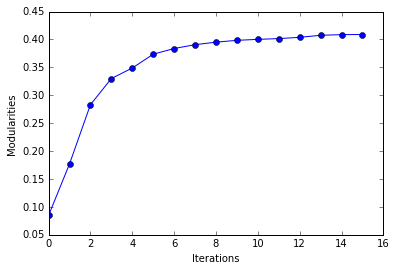

('NMI:', 0.7405710865123265)
1033
1460
1398


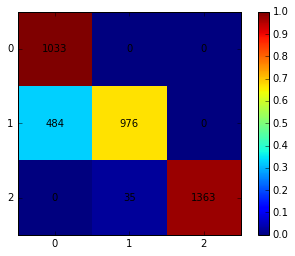

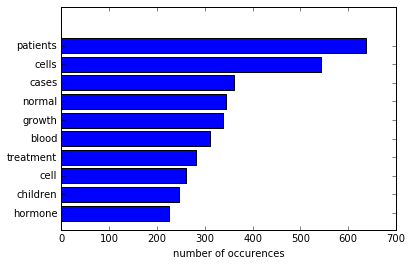

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.metrics import confusion_matrix
from sklearn.metrics.cluster import normalized_mutual_info_score as nmi
from coclust.CoclustMod import CoclustMod
from coclust.utils.evaluation import (plot_confusion_matrix,
                                      plot_top_terms,
                                      get_graph)

# Retrieve the Classic3  document-term matrix from a matlab file
file_name = "../datasets/classic3.mat"
matlab_dict = loadmat(file_name)

X = matlab_dict['A']

# Create and fit a model with 3 co-clusters
model = CoclustMod(n_clusters=3, random_state=0)
model.fit(X)

# Plot modularities
print("MODULARITY:", model.modularity)
plt.plot(model.modularities, marker='o')
plt.ylabel('Modularities')
plt.xlabel('Iterations')
plt.show()


# plot cm
true_row_labels = matlab_dict['labels'].flatten()
predicted_row_labels = sorted(model.row_labels_)
print("NMI:", nmi(true_row_labels, predicted_row_labels))
cm = confusion_matrix(true_row_labels, predicted_row_labels)
plot_confusion_matrix(cm, colormap=plt.cm.jet, labels='012')


# plot terms
terms = [str(x[0][0]) for x in matlab_dict['ms']]
plot_top_terms(model, X, terms, n_cluster=1)

In [12]:
graph = get_graph(X, model, terms, 1, 10, 30)

== top term 0 990
[ 990  426  647  720 1319  749  826   78  600  879 1375 1241  641  629  497
  555 1011 1071  417  736  355  288  549  245   48  300  963  993 1364  893]

== top term 1 275
[ 275  143  468 1106  104 1098  772  475  214 1049  718   92  742  717  758
  563 1374  899 1029  220  906  123  562 1211 1250  136  865 1094  326  346]

== top term 2 300
[ 300  306  985  879  737  876  736 1312  990  136  237  410  567  707  471
  403  878  705  352  484 1237 1154  313 1355 1209  244   60  922  455  913]

== top term 3 407
[ 407  351 1134  987  313  753    3  651 1011   25  446  990  185  199  240
  720  874  434  873  150  275  639  622  362  986  625  429  653  462  382]

== top term 4 375
[ 375  528 1105 1315 1242  823   37  240 1065  201 1068  923  347 1244  895
  180 1164 1349   10  319  139  178 1134  160   25  779  697  297  730  549]

== top term 5 197
[ 197  113  861  487  233  570  399  318  308  369   38  547 1134  584 1339
  569  873 1065  619  118  524  418  374  298 

In [13]:
%%javascript
require.config({
  paths: {
      d3: '//cdnjs.cloudflare.com/ajax/libs/d3/3.4.8/d3.min'
  }
});

<IPython.core.display.Javascript object>

In [14]:
from IPython.display import Javascript
#runs arbitrary javascript, client-side
Javascript("""
           window.graph={};
           """.format(graph))

<IPython.core.display.Javascript object>

In [16]:
%%javascript
require(['d3'], function(d3){
  //a weird idempotency thing
  $("#chart1").remove();
  //create canvas
  element.append("<div id='chart1'></div>");
  $("#chart1").width("1160px");
  $("#chart1").height("800px");        
  var margin = {top: 20, right: 20, bottom: 30, left: 40};
  var width = 1280 - margin.left - margin.right;
  var height = 800 - margin.top - margin.bottom;
  var svg = d3.select("#chart1").append("svg")
    .style("position", "relative")
    .style("max-width", "960px")
    .attr("width", width + "px")
    .attr("height", (height + 50) + "px")
    .call(d3.behavior.zoom().on("zoom", redraw))
    .append("g")
    .attr("transform", "translate(" + margin.left + "," + margin.top + ")");
    
    
  function redraw() {
      svg.attr("transform",
               "translate(" + d3.event.translate + ")"
               + " scale(" + d3.event.scale + ")");
  }   

  var color = d3.scale.category20();

  var force = d3.layout.force()
    .charge(-500)
    //.linkDistance(5)
    .linkDistance(function(d) { return (1 - d.value); })
    .size([width, height]);

  var graph = window.graph;
    
  force
      .nodes(graph.nodes)
      .links(graph.links)
      .start();

  var link = svg.selectAll(".link")
      .data(graph.links)
      .enter().append("line")
      .attr("class", "link")
      .style("stroke", "#999;")
      .style("stroke-opacity", .6)
      .style("stroke-width", function(d) { return Math.sqrt(d.value); })
  
      .style("stroke", "blue");

  var node = svg.selectAll(".node")
      .data(graph.nodes)
      .enter().append("g")
      .attr("class", "node")
      .call(force.drag);
    
  node.append("circle")
      .attr("class", "node_circle")
      .attr("r", 8)
      .style("fill", function(d) { return color(d.group); });

  node.append("text")
      .attr("class", "node_text")
      .attr("dx", 12)
      .attr("dy", ".35em")
      .text(function(d) { return d.name });

  node.append("title")
      .text(function(d) { return d.name; });

  var node_text = svg.selectAll(".node_text");
  var node_circle = svg.selectAll(".node_circle");
    
  force.on("tick", function() {
    link.attr("x1", function(d) { return d.source.x; })
        .attr("y1", function(d) { return d.source.y; })
        .attr("x2", function(d) { return d.target.x; })
        .attr("y2", function(d) { return d.target.y; });

    node_circle.attr("cx", function(d) { return d.x; })
        .attr("cy", function(d) { return d.y; });
      
    node_text.attr("x", function(d) { return d.x; })
        .attr("y", function(d) { return d.y; });
  });
});

<IPython.core.display.Javascript object>